In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,ShuffleSplit
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm, zscore
#import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

# Classification of clear speech-detection

In [2]:
pathr="C:/Users/Sultan/OneDrive - The University of Memphis/RESEARCH2017S/CLUSTER_channels/S_E12/"
fnamecl='Allsube12.xlsx'
d=pd.read_excel(pathr+fnamecl)
print("Total rows: {0}".format(len(d)))

Total rows: 32


In [3]:
# allacc=[];
# for count in range(2,108):
#     dpc=[];yc=[];
#     for i in range(3):
#         a=[]
#         k=0
#         for j in range(5):
#             #print i,k
#             dd=d.values[i,k+count]
#             #b=np.concatenate((M,dd),axis=0)
#             j+=1
#             k=106*j
#             a.append(dd)      
#         y=d.values[i,0]
#         a.append(y)
#         dpc.append(a)
#         c=pd.DataFrame(dpc)
#         X=c.iloc[:,0:5]
#         labels=c.iloc[:,5]

              0             1             2             3             4    5
0 -9.439406e-08 -2.491720e-07 -2.100276e-07 -9.379948e-09 -1.653595e-07  0.0
              0             1             2             3             4    5
0 -9.439406e-08 -2.491720e-07 -2.100276e-07 -9.379948e-09 -1.653595e-07  0.0
1 -3.025409e-07 -1.911162e-07 -5.708963e-08 -3.012139e-07 -4.582609e-07  1.0
              0             1             2             3             4    5
0 -9.439406e-08 -2.491720e-07 -2.100276e-07 -9.379948e-09 -1.653595e-07  0.0
1 -3.025409e-07 -1.911162e-07 -5.708963e-08 -3.012139e-07 -4.582609e-07  1.0
2 -1.799726e-07 -6.433920e-08 -2.729479e-08 -1.625181e-07 -2.415732e-07  1.0
              0             1             2             3             4    5
0 -9.439406e-08 -2.491720e-07 -2.100276e-07 -9.379948e-09 -1.653595e-07  0.0
1 -3.025409e-07 -1.911162e-07 -5.708963e-08 -3.012139e-07 -4.582609e-07  1.0
2 -1.799726e-07 -6.433920e-08 -2.729479e-08 -1.625181e-07 -2.415732e-07  1.0

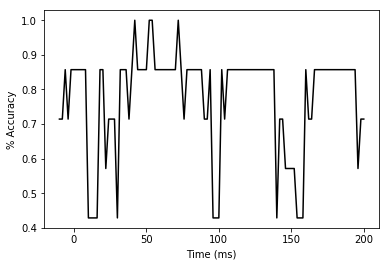

In [15]:
allacc=[];
for count in range(2,108):# Number of sample in the data
    dpc=[];yc=[];
    for i in range(32):
        a=[]
        k=0
        for j in range(5):
            #print i,k
            dd=d.values[i,k+count] # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            k=106*j
            a.append(dd)      
        y=d.values[i,0]; # Label first column
        a.append(y)
        dpc.append(a)
        c=pd.DataFrame(dpc)
        print c
        X=c.iloc[:,0:5]
        labels=c.iloc[:,5]
        #print y
    print X, labels
    X_scaled = preprocessing.scale(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,labels, test_size=.20, random_state=40) 
    #par=np.unique(y_test,return_counts=True)
    cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10,100],'gamma':[0.01,.002]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train, y_train)
    accf= clf.cv_results_['mean_test_score']
    accf
    acc=accuracy_score(clf.best_estimator_.predict(X_test),y_test)
    allacc.append(acc)
    Acd=pd.DataFrame(allacc)
    #print acc*100.0
t=np.linspace(-10,200,106)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acd,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par

In [5]:
#c

In [7]:
#print par
time=pd.DataFrame(t)
tad=pd.concat([time, Acd],axis=1)
selt=tad.iloc[25:34]
av=selt.mean()
print selt,'\n','The average accuracy over the time is:', av.iloc[1]*100.0
#print tad.iloc[20:42]
#tad.to_csv('clear_speech_classi.csv')

       0         0
25  40.0  0.857143
26  42.0  1.000000
27  44.0  0.857143
28  46.0  0.857143
29  48.0  0.857143
30  50.0  0.857143
31  52.0  1.000000
32  54.0  1.000000
33  56.0  0.857143 
The average accuracy over the time is: 90.4761904762


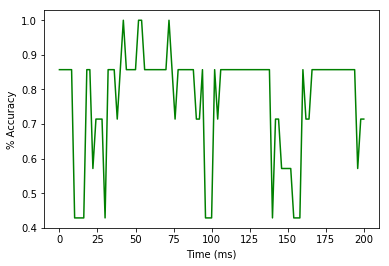

In [8]:
t1=tad.iloc[5:,0];Acd1=tad.iloc[5:,1];
plt.plot(t1,Acd1,c='g')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')

# Classification from LH's two clusters (C1, C2)

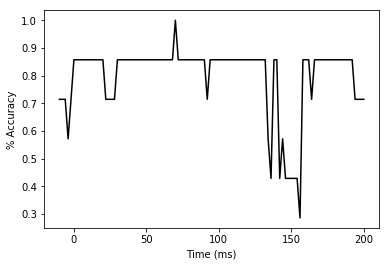

In [9]:
allacc=[];
for count in range(2,108): # Number of sample in the data
    dpc=[];yc=[]; # empty variable for dictionary
    for i in range(32): # number of participant
        a=[]; # Dictionary
        k=0 ;
        for j in range(2):
            #print i,k
            dd=d.values[i,k+count] ; # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            k=106*j
            a.append(dd) # append features      
        y=d.values[i,0]
        a.append(y)
        dpc.append(a) # data frame with label
        c=pd.DataFrame(dpc) # c is the new data 
        X=c.iloc[:,0:2] # X is the feature from clusters
        labels=c.iloc[:,2]
# Upto this feature extraction
        #print y
    #print X
    X_scaled = preprocessing.scale(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,labels, test_size=.20, random_state=40) 
    #par=np.unique(y_test,return_counts=True)
    cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10,100],'gamma':[0.01,.002]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train, y_train)
    accf= clf.cv_results_['mean_test_score']
    accf
    acc=accuracy_score(clf.best_estimator_.predict(X_test),y_test)
    allacc.append(acc)
    Acd=pd.DataFrame(allacc)
    #print acc*100.0
t=np.linspace(-10,200,106)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acd,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par

In [10]:
#print par
time=pd.DataFrame(t)
tad=pd.concat([time, Acd],axis=1)
selt=tad.iloc[35:45]
av=selt.mean()
print selt,'\n','The average accuracy over the time is:', av.iloc[1]*100.0
#print tad.iloc[20:42]
#tad.to_csv('clear_speech_classi.csv')

       0         0
35  60.0  0.857143
36  62.0  0.857143
37  64.0  0.857143
38  66.0  0.857143
39  68.0  0.857143
40  70.0  1.000000
41  72.0  0.857143
42  74.0  0.857143
43  76.0  0.857143
44  78.0  0.857143 
The average accuracy over the time is: 87.1428571429


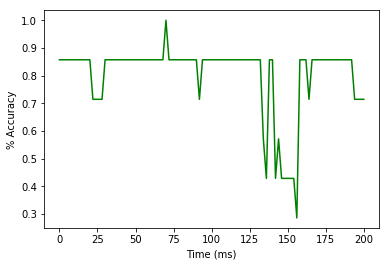

In [11]:
t1=tad.iloc[5:,0];Acd1=tad.iloc[5:,1];
plt.plot(t1,Acd1,c='g')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')

# Classification from RH's two clusters (C3, C4)

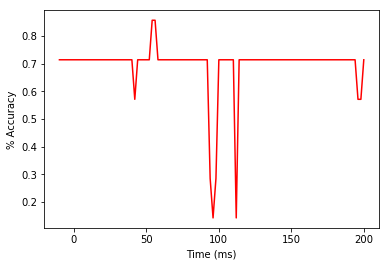

In [12]:
allacc=[];
for count in range(2,108): # Number of sample in the data
    dpc=[];yc=[]; # empty variable for dictionary
    for i in range(32): # number of participant
        a=[]; # Dictionary
        k=0 ;
        for j in range(2,4):
            k=106*j
            #print i,k
            dd=d.values[i,k+count] ; # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            a.append(dd) # append features      
        y=d.values[i,0]
        a.append(y)
        dpc.append(a) # data frame with label
        c=pd.DataFrame(dpc) # c is the new data 
        X=c.iloc[:,0:2] # X is the feature from clusters
        labels=c.iloc[:,2]
           #print y
    #print X
    X_scaled = preprocessing.scale(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,labels, test_size=.20, random_state=57) 
    #par=np.unique(y_test,return_counts=True)
    cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10,100],'gamma':[0.01,.002]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train, y_train)
    accf= clf.cv_results_['mean_test_score']
    accf
    acc=accuracy_score(clf.best_estimator_.predict(X_test),y_test)
    allacc.append(acc)
    Acdn=pd.DataFrame(allacc)
    #print acc*100.0
t=np.linspace(-10,200,106)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdn,c='r')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par

In [13]:
#print par
time=pd.DataFrame(t)
tadn=pd.concat([time, Acdn],axis=1)
seltn=tadn.iloc[27:37]
av=seltn.mean()
print seltn,'\n','The average accuracy over the time is:', av.iloc[1]*100.0
#print tad.iloc[40:60]
#tadn.to_csv('Noise-degraded.csv')

       0         0
27  44.0  0.714286
28  46.0  0.714286
29  48.0  0.714286
30  50.0  0.714286
31  52.0  0.714286
32  54.0  0.857143
33  56.0  0.857143
34  58.0  0.714286
35  60.0  0.714286
36  62.0  0.714286 
The average accuracy over the time is: 74.2857142857
